In [20]:
import pandas
# use lib for scraping
import requests
from bs4 import BeautifulSoup

In [22]:
page_per_topics = {
    'castles' : 2,
    'churches' : 5,
    'famous-films' : 9,
    'houses' : 10,
}

In [23]:
url = 'https://www.grabcraft.com/minecraft/'
# iterate over the topics
import os
for topic in page_per_topics:
    print(f"scraping {topic}")
    images = []
    for page in range(1,page_per_topics[topic]+1):
        print(f"scraping {topic} page {page}")
        # get the page

        # create the folder topics_image if it does not exist
        if not os.path.exists('images/' + topic):
            os.makedirs('images/' + topic)
        page = requests.get(url + topic + '/pg/' + str(page))
        # parse the page
        soup = BeautifulSoup(page.content, 'html.parser')
        for product in soup.find_all('div', class_='product-box'):
            #print(f"name : {product.find('a').get('title')}")
            images.append(product.find('img').get('src'))
            # download the images
    import urllib.request
    for image in images:
        print(f"iterating image number {images.index(image)} / {len(images)}")
        #print(f"downloading {image}")
        # save image to the folder images
        urllib.request.urlretrieve(image, 'images/' + topic + '/' + image.split('/')[-1])
        # show the image




scraping castles
scraping castles page 1
scraping castles page 2
iterating image number 0 / 24
iterating image number 1 / 24
iterating image number 2 / 24
iterating image number 3 / 24
iterating image number 4 / 24
iterating image number 5 / 24
iterating image number 6 / 24
iterating image number 7 / 24
iterating image number 8 / 24
iterating image number 9 / 24
iterating image number 10 / 24
iterating image number 11 / 24
iterating image number 12 / 24
iterating image number 13 / 24
iterating image number 14 / 24
iterating image number 15 / 24
iterating image number 16 / 24
iterating image number 17 / 24
iterating image number 18 / 24
iterating image number 19 / 24
iterating image number 20 / 24
iterating image number 21 / 24
iterating image number 22 / 24
iterating image number 23 / 24
scraping churches
scraping churches page 1
scraping churches page 2
scraping churches page 3
scraping churches page 4
scraping churches page 5
iterating image number 0 / 77
iterating image number 1 / 7

In [24]:
# count the number of images in the folder images
import os
number_of_images = 0
# check all the folders in the folder images
for folder in os.listdir('images'):
    # count the number of files in the folder
    if folder != ".DS_Store":
        print(f"folder {folder} has {len(os.listdir('images/' + folder))} images")
        number_of_images += len(os.listdir('images/' + folder))

print(f"total number of images : {number_of_images}")


folder houses has 160 images
folder castles has 24 images
folder churches has 77 images
folder famous-films has 140 images
total number of images : 401


In [30]:
# the image have the name 'thumb_' + title + '-' + number + '.png'
# change the name of the images so that they have the name of the title, and reaplace the '-' by '_'
import os
for folder in os.listdir('images'):
    if folder != ".DS_Store":
        for image in os.listdir('images/' + folder):
            if image != ".DS_Store":
                # check if the image name end with .png
                if image.split('.')[-1] == 'png':
                    # get the title of the image
                    title = image.split('-')[0].split('thumb_')[1]
                    # get the number of the image
                    number = image.split('-')[1].split('.')[0]
                    # rename the image
                    os.rename('images/' + folder + '/' + image, 'images/' + folder + '/' + title + '_' + number + '.png')

IndexError: list index out of range

In [31]:
# get the resolution of the images
import matplotlib.pyplot as plt
import os
resolution_images = []
for folder in os.listdir('images'):
    if folder != ".DS_Store":
        for image in os.listdir('images/' + folder):
            if image != ".DS_Store":
                # check if the image name end with .png
                if image.split('.')[-1] == 'png':
                    print(f"folder {folder} image {image} has resolution {plt.imread('images/' + folder + '/' + image).shape}")
                    resolution_images.append(plt.imread('images/' + folder + '/' + image).shape)
print(f"total number of images : {len(resolution_images)}")
print(f"number of different resolutions : {len(set(resolution_images))}")


folder houses image tang-style.png has resolution (180, 180, 4)
folder houses image minimalist-gothic.png has resolution (180, 180, 4)
folder houses image traditional-house.png has resolution (180, 180, 4)
folder houses image fantasy-unfurnished.png has resolution (180, 180, 4)
folder houses image wood-elf.png has resolution (180, 180, 4)
folder houses image troll-hut.png has resolution (180, 180, 4)
folder houses image spruce-medieval.png has resolution (180, 180, 4)
folder houses image fantasy-staircase.png has resolution (180, 180, 4)
folder houses image nordic-unfurnished.png has resolution (180, 180, 4)
folder houses image priests-rest.png has resolution (180, 180, 4)
folder houses image fantasy-gatehouse.png has resolution (180, 180, 4)
folder houses image unfurnished-medieval.png has resolution (180, 180, 4)
folder houses image medieval-grocery.png has resolution (180, 180, 4)
folder houses image fantasy-window.png has resolution (180, 180, 4)
folder houses image medieval-rustic

SyntaxError: not a PNG file (<string>)

['Age of Empires Castle', 'Mini Castle', 'Medieval Fortified Park', 'Bergfried Defensive Keep', 'Medieval Small Castle', 'Feudal Japanese Tower Castle', 'Feudal Japanese Osaka Castle', 'Fantasy World Small Castle', 'Medieval Throne Hall', 'Age Of Empires Asian Castle', 'Large Asian Fort', 'Small Medieval Church 1', 'Small Fantasy Castle', 'Victorian Castle', 'Small Castle', 'Medieval Keep/Castle']


In [18]:
# get the image url, that is inside each product-box. class is product-image
images = []
for product in soup.find_all('div', class_='product-box'):
    print(f"name : {product.find('a').get('title')}")
    images.append(product.find('img').get('src'))


name : Age of Empires Castle
name : Mini Castle
name : Medieval Fortified Park
name : Bergfried Defensive Keep
name : Medieval Small Castle
name : Feudal Japanese Tower Castle
name : Feudal Japanese Osaka Castle
name : Fantasy World Small Castle
name : Medieval Throne Hall
name : Age Of Empires Asian Castle
name : Large Asian Fort
name : Small Medieval Church 1
name : Small Fantasy Castle
name : Victorian Castle
name : Small Castle
name : Medieval Keep/Castle


downloading https://h9y3q5u4.stackpathcdn.com/files/products/thumb/thumb_age-of-empires-castle-21606.png
downloading https://h9y3q5u4.stackpathcdn.com/files/products/thumb/thumb_mini-castle-21579.png
downloading https://h9y3q5u4.stackpathcdn.com/files/products/thumb/thumb_medieval-fortified-park-21481.png
downloading https://h9y3q5u4.stackpathcdn.com/files/products/thumb/thumb_bergfried-defensive-keep-18081.png
downloading https://h9y3q5u4.stackpathcdn.com/files/products/thumb/thumb_medieval-small-castle-16849.png
downloading https://h9y3q5u4.stackpathcdn.com/files/products/thumb/thumb_feudal-japanese-tower-castle-13909.png
downloading https://h9y3q5u4.stackpathcdn.com/files/products/thumb/thumb_feudal-japanese-osaka-castle-13901.png
downloading https://h9y3q5u4.stackpathcdn.com/files/products/thumb/thumb_fantasy-world-small-castle-12622.png
downloading https://h9y3q5u4.stackpathcdn.com/files/products/thumb/thumb_medieval-throne-hall-10164.png
downloading https://h9y3q5u4.stackpathcdn.

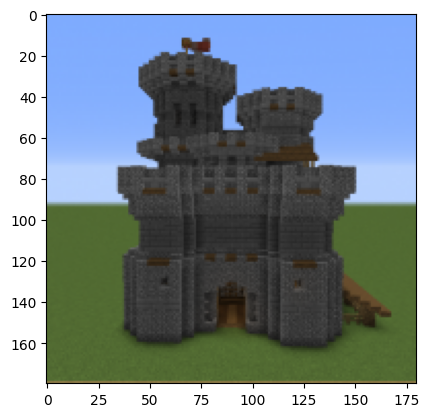

In [23]:
# download the images
import urllib.request
import matplotlib.pyplot as plt
for image in images:
    print(f"downloading {image}")
    # save image to the folder images
    urllib.request.urlretrieve(image, 'images/' + image.split('/')[-1])
    # show the image
    plt.imshow(plt.imread('images/' + image.split('/')[-1]))

